In [90]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter

In [2]:
df_imdb_tn = pd.read_csv("../data/df_imdb_tn.csv")
df_imdb_tn_trimmed = pd.read_csv("../data/df_imdb_tn_trimmed.csv")

<AxesSubplot:xlabel='runtime_minutes', ylabel='worldwide_gross'>

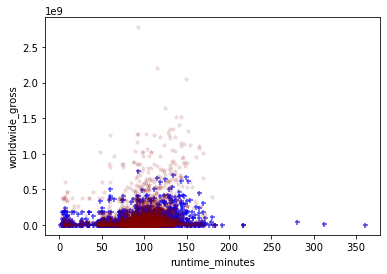

In [23]:
sns.regplot(x = df_imdb_tn_trimmed['runtime_minutes'], y = df_imdb_tn_trimmed['domestic_gross'], marker = '+', 
            scatter_kws={"color":"blue","alpha":0.7,"s":25}, fit_reg = False)
sns.regplot(x = df_imdb_tn_trimmed['runtime_minutes'], y = df_imdb_tn_trimmed['worldwide_gross'], marker = '*', 
            scatter_kws={"color":"darkred","alpha":0.1,"s":20}, fit_reg = False)

#so it seems 90 - 130 is the sweet spot for most gross income

In [24]:
df_no_outlier = df_imdb_tn_trimmed[df_imdb_tn_trimmed['runtime_minutes'] < 200]

<AxesSubplot:xlabel='runtime_minutes', ylabel='worldwide_gross'>

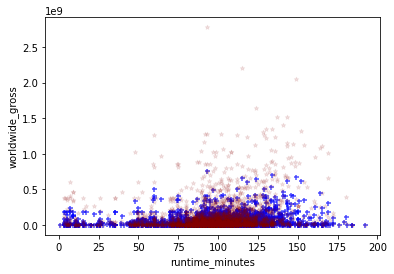

In [26]:
sns.regplot(x = df_no_outlier['runtime_minutes'], y = df_no_outlier['domestic_gross'], marker = '+', 
            scatter_kws={"color":"blue","alpha":0.7,"s":25}, fit_reg = False)
sns.regplot(x = df_no_outlier['runtime_minutes'], y = df_no_outlier['worldwide_gross'], marker = '*', 
            scatter_kws={"color":"darkred","alpha":0.1,"s":20}, fit_reg = False)
#removing outliers for better view

In [27]:
df_imdb_tn_trimmed[df_imdb_tn_trimmed['runtime_minutes'] < 30]
#just checking wtf movies are less than 30 mins

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,production_budget,domestic_gross,worldwide_gross
157,964,tt10065960,snatched,Snatched,2016,11.0,Drama,42000000.0,45852178.0,57852177.0
160,1180,tt10090222,inferno,Inferno,2018,16.0,Documentary,75000000.0,34343574.0,219519367.0
163,1421,tt10118052,believe,Believe,2018,16.0,Documentary,3500000.0,890303.0,890303.0
183,2809,tt10291640,adam,Adam,2019,20.0,Drama,3200000.0,2283291.0,2834485.0
187,3082,tt10308134,lovesick,Lovesick,2019,4.0,"Comedy,Drama",10100000.0,10143618.0,10143618.0
...,...,...,...,...,...,...,...,...,...,...
3392,140230,tt9064942,asabovesobelow,"As Above, So Below",2017,10.0,"Animation,Documentary,Sci-Fi",5000000.0,21222315.0,41824066.0
3396,140587,tt9103796,bones,Bones,2018,5.0,Documentary,10000000.0,7316658.0,8378853.0
3397,140731,tt9117320,teeth,Teeth,2018,13.0,Documentary,2000000.0,347578.0,2350641.0
3418,142154,tt9310054,thecalling,The Calling,2018,10.0,Documentary,2500000.0,0.0,0.0


In [38]:
df_imdb_tn_trimmed['genres'].value_counts().head(20)
#counting each genre count

Drama                         404
Documentary                   251
Comedy                        118
Comedy,Drama                  106
Comedy,Drama,Romance           86
Drama,Romance                  85
Adventure,Animation,Comedy     75
Horror                         74
Comedy,Romance                 61
Action,Crime,Drama             61
Action,Adventure,Sci-Fi        60
Thriller                       60
Drama,Thriller                 59
Horror,Thriller                55
Horror,Mystery,Thriller        50
Action,Adventure,Fantasy       42
Crime,Drama,Thriller           40
Action,Comedy,Crime            37
Action,Adventure,Drama         35
Action,Adventure,Comedy        35
Name: genres, dtype: int64

In [ ]:
df_imdb_tn_trimmed[(df_imdb_tn_trimmed['genres'].str.contains('Action'))]

In [37]:
df_imdb_tn_trimmed[(df_imdb_tn_trimmed['genres'].str.contains('Action')) & 
                  (df_imdb_tn_trimmed['genres'].str.contains('Comedy')) ]
#testing how to look at genres individually if we need to

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,production_budget,domestic_gross,worldwide_gross
0,20,tt0249516,foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",45000000.0,0.0,73706.0
21,121,tt0446029,scottpilgrimvstheworld,Scott Pilgrim vs. the World,2010,112.0,"Action,Comedy,Fantasy",85000000.0,31611316.0,48056764.0
22,125,tt0448115,shazam!,Shazam!,2019,132.0,"Action,Adventure,Comedy",85000000.0,139606856.0,362899733.0
35,172,tt0471042,towerheist,Tower Heist,2011,104.0,"Action,Comedy,Crime",85000000.0,78046570.0,150422946.0
41,190,tt0478970,antman,Ant-Man,2015,117.0,"Action,Adventure,Comedy",130000000.0,180202163.0,518858449.0
...,...,...,...,...,...,...,...,...,...,...
3231,122872,tt7424200,teentitansgo!tothemovies,Teen Titans Go! To the Movies,2018,84.0,"Action,Animation,Comedy",10000000.0,29790236.0,51620593.0
3258,125492,tt7632298,anonymous,Anonymous,2017,60.0,"Action,Comedy,Mystery",27500000.0,4463292.0,15815509.0
3299,130266,tt8043306,teefaintrouble,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",1500000.0,0.0,98806.0
3328,134282,tt8430862,tag,Tag,2017,46.0,"Action,Comedy",28000000.0,54730625.0,77026186.0


# Begin hell

In [47]:
mean_grouped_gross = df_imdb_tn_trimmed.groupby(['genres'])['worldwide_gross'].mean()
#group by genres, giving mean

In [46]:
count_grouped_gross = df_imdb_tn_trimmed.groupby(['genres'])['worldwide_gross'].count().sort_values(ascending = False)
#group by genres, giving count

In [56]:
df_count = df_imdb_tn_trimmed.groupby(['genres']).count()
#above 2 of this cell give series, i cant be fucked with to figure out rn how to merge those.
#so will raw dog drop columns 

In [60]:
df_count.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [63]:
df_count.drop( ['movie_id', 'primary_title'], axis = 1, inplace = True)

In [64]:
df_count.drop( ['start_year', 'runtime_minutes', 'production_budget', 'domestic_gross'], axis = 1, inplace = True)

In [66]:
df_count.drop(['worldwide_gross'], axis = 1, inplace = True)
#above is raw dog drop cols, could be one line im dumb af

In [68]:
df_count_genres = df_count
#renaming so i know wtf im looking at

In [ ]:
df_mean_genres = df_imdb_tn_trimmed.groupby(['genres']).mean()
#same as count, going to raw dog drop cols for means

In [72]:
df_mean_genres.drop( ['Unnamed: 0', 'start_year' ], axis = 1, inplace = True)

In [78]:
df_count_genres.rename(columns = {'original_title': 'count'}, inplace = True)
#renaming dumbass count col to make sense

In [80]:
df_mean_genres = df_mean_genres.merge(
    df_count_genres,
left_on='genres',
right_on='genres',
how = 'inner')
#merging these fuckers

In [81]:
df_mean_genres
#wahoo it works

,runtime_minutes,production_budget,domestic_gross,worldwide_gross,count
genres,,,,,
Action,96.944444,3.502222e+07,3.725538e+07,8.019518e+07,18
"Action,Adventure",110.000000,9.250000e+06,5.887000e+03,5.683002e+06,2
"Action,Adventure,Animation",100.666667,1.142500e+08,1.538964e+08,4.236781e+08,18
"Action,Adventure,Biography",129.200000,7.100000e+07,5.671719e+07,1.880822e+08,5
"Action,Adventure,Comedy",108.285714,8.262857e+07,1.148922e+08,3.031241e+08,35
...,...,...,...,...,...
"Sci-Fi,Thriller",83.428571,1.914571e+07,2.229208e+07,3.692518e+07,7
Sport,114.000000,1.900000e+07,5.310554e+06,5.745503e+06,1
Thriller,87.416667,2.761443e+07,2.702663e+07,6.547057e+07,60


In [84]:
df_mean_genres.sort_values(by = 'worldwide_gross', ascending = False)
#sorting by most money made, but there seems to be special cases where only 1 movie of that genre cluster is made

,runtime_minutes,production_budget,domestic_gross,worldwide_gross,count
genres,,,,,
"Fantasy,Romance",92.000000,1.500000e+08,4.007380e+08,1.272470e+09,1
"Adventure,Drama,Sport",93.000000,1.500000e+08,4.007380e+08,1.272470e+09,1
"Family,Fantasy,Musical",94.500000,9.000000e+07,4.400357e+08,9.338154e+08,4
"Adventure,Fantasy",139.666667,2.316667e+08,1.928914e+08,7.012107e+08,3
"Action,Adventure,Sci-Fi",126.583333,1.586733e+08,2.153937e+08,5.887983e+08,60
...,...,...,...,...,...
"Crime,Documentary,History",92.000000,3.000000e+06,0.000000e+00,0.000000e+00,1
"Documentary,Drama,Reality-TV",80.000000,1.000000e+06,0.000000e+00,0.000000e+00,1
"Comedy,Crime,Horror",81.000000,1.200000e+06,0.000000e+00,0.000000e+00,1


In [86]:
df_mean_genres[df_mean_genres['count'] > 2].sort_values(by = 'worldwide_gross', ascending = False).head(20)
#solving above issue to include trilogies

,runtime_minutes,production_budget,domestic_gross,worldwide_gross,count
genres,,,,,
"Family,Fantasy,Musical",94.500000,9.000000e+07,4.400357e+08,9.338154e+08,4
"Adventure,Fantasy",139.666667,2.316667e+08,1.928914e+08,7.012107e+08,3
"Action,Adventure,Sci-Fi",126.583333,1.586733e+08,2.153937e+08,5.887983e+08,60
"Adventure,Drama,Fantasy",116.750000,7.478125e+07,1.821224e+08,5.508636e+08,8
"Adventure,Drama,Sci-Fi",136.000000,9.700000e+07,1.388172e+08,4.405503e+08,3
"Action,Adventure,Animation",100.666667,1.142500e+08,1.538964e+08,4.236781e+08,18
"Adventure,Animation,Comedy",93.720000,9.805333e+07,1.330008e+08,3.744613e+08,75
"Action,Adventure,Fantasy",115.928571,1.358952e+08,1.258566e+08,3.718843e+08,42
"Adventure,Fantasy,Mystery",118.000000,6.733333e+07,1.106610e+08,3.647677e+08,3


In [87]:
df_mean_genres_sorted = df_mean_genres[df_mean_genres['count'] > 2].sort_values(by = 'worldwide_gross', ascending = False).head(20)
#storing above to plot

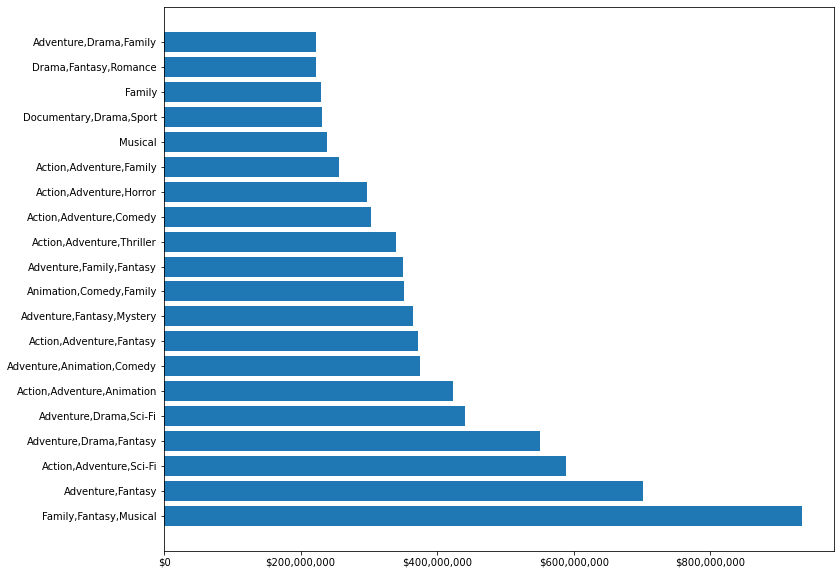

In [96]:
fig, ax = plt.subplots(figsize=(12,10))

ax.barh(df_mean_genres_sorted.index, df_mean_genres_sorted['worldwide_gross'])
ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
#ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}$'))